**Collaborated with student Sophie Guo, Yitong Zhao, and Fanxi Chen**

## Section 1: Group Comparisons with Continuous Data

#### 1. Read the males_ht_wt_cntry.csv file into a data frame

In [1]:
import pandas as pd
import numpy as np
males = pd.read_csv("../W4/males_ht_wt_cntry.csv")

#### 2. Examine the data

In [2]:
# 2a. Display some rows to make sure it imported correctly
males.head()

,Height,Weight,Country
0,64.0,144.0,Italy
1,68.0,150.0,Italy
2,66.0,147.0,Italy
3,71.0,170.0,Italy
4,65.0,163.0,Italy


<AxesSubplot:xlabel='Height', ylabel='Count'>

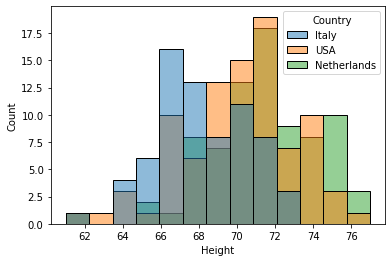

In [3]:
# 2b. Generate histograms of the heights by country
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=males["Height"], hue=males["Country"], label="height") # multiple="dodge"

<AxesSubplot:xlabel='Weight', ylabel='Count'>

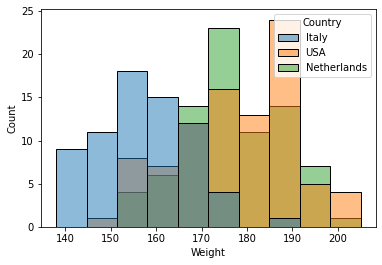

In [4]:
# 2c. Generate histograms of the weights by country
sns.histplot(x=males["Weight"], hue=males["Country"], label="height")

#### 3. Conduct a test to determine if the weights differ by nationality and interpret your results.

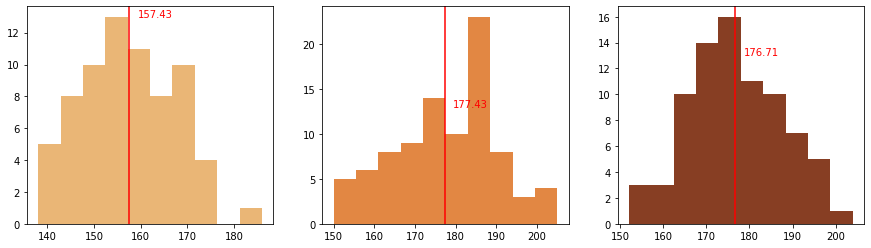

In [5]:
w1 = males.loc[males["Country"]=="Italy", "Weight"]
w2 = males.loc[males["Country"]=="USA", "Weight"]
w3 = males.loc[males["Country"]=="Netherlands", "Weight"]

# (1) check if data follows a normal distribution
fig = plt.figure(figsize=(15,4))   
fig.subplots_adjust(wspace=0.2, hspace=0.1) 

ax1 = fig.add_subplot(131) 
plt.hist(w1, bins=10, color = "#eab676")
plt.axvline(x = np.mean(w1), c = 'r')
plt.text(np.mean(w1)+2, 13, round(np.mean(w1),2), c='r')

ax2 = fig.add_subplot(132) 
plt.hist(w2, bins=10, color = "#e28743")
plt.axvline(x = np.mean(w2), c = 'r')
plt.text(np.mean(w2)+2, 13, round(np.mean(w2),2), c='r')

ax3 = fig.add_subplot(133) 
plt.hist(w3, bins=10, color = "#873e23")
plt.axvline(x = np.mean(w3), c = 'r')
plt.text(np.mean(w3)+2, 13, round(np.mean(w3),2), c='r')

plt.show()

*It looks like the three samples all roughly follow normal distribution.*

In [6]:
# (2) check if variances are equal across groups
from scipy.stats import f_oneway, levene

stat, p = levene(w1, w2, w3)
print("resulting p-value =", p)

resulting p-value = 0.07218180380373036


*The resulting p-value for levene is around 0.07, which means that we do not reject the null hypothesis that the three sample weights are from populations with equal variances. With this confirmation, ANOVA test is available to use on this dataset.*

In [7]:
result = f_oneway(w1, w2, w3)
print("p-value:", result.pvalue, "\nF-stat:", result.statistic)

p-value: 1.9503368513081563e-25 
F-stat: 73.0316861418844


*The resulting p-value from ANOVA test is smaller than 0.05. This means that the weights across three countries are significantly unlikely to be equal. Based on the result, we conclude that the average weights of 3 countries are not equal.*

#### 4. ANOVA won’t tell you which sets of weights differ. You will need to compare each group against each other to determine that.

In [8]:
# a. Conduct a test to determine if the weights of the Italian males were significantly different than the Dutch males 
#    (from the Netherlands) and interpret your results
import scipy.stats as stats
print(np.var(w1), np.var(w3)) # see if two sample have equal variance

101.44489795918368 118.35484374999999


In [9]:
stats.ttest_ind(w1, w3, equal_var=True)

Ttest_indResult(statistic=-11.135754716464666, pvalue=2.6541621479997745e-21)

*The two samples have close variance (118.35/101.44 < 4), so equal variance is assumed.*  
*Two-sample t-test shows that p-value is much smaller than 0.05, meaning that Italian males and Dutch males have significantly different weights.*

In [10]:
# b. Conduct a test to determine if the weights of the Italian males were significantly different than the American males 
#    and interpret your results
print(np.var(w1), np.var(w2))

101.44489795918368 162.00111111111104


In [11]:
stats.ttest_ind(w1, w2, equal_var=True)

Ttest_indResult(statistic=-10.715936381667479, pvalue=1.755707616976545e-20)

*The two samples have close variance (162/101.44 < 4), so equal variance is assumed.*  
*Two-sample t-test shows that p-value is smaller than 0.05, meaning that Italian males and American males have significantly different weights.*

In [12]:
# c. Conduct a test to determine if the weights of the American males were significantly different than the Dutch males 
#    (from the Netherlands) and interpret your results
print(np.var(w2), np.var(w3))

162.00111111111104 118.35484374999999


In [13]:
stats.ttest_ind(w2, w3, equal_var=True)

Ttest_indResult(statistic=0.39209148079725187, pvalue=0.6954875719362548)

*The two samples have close variance (162/118.35 < 4), so equal variance is assumed.*  
*Two-sample t-test shows that p-value is greater than 0.05, meaning that we fail to reject the null hypothesis that Dutch males and American males have significantly different weights.*

#### 5. What is the probability one of these t-tests is not actually significant (i.e. false positive)?

In [14]:
1 - (1-0.05)**3

0.1426250000000001

*Using the formula P(Making at least 1 Type I error in m tests) = 1-(1-α)^m, m = 3 (Italy-USA, Italy-Netherlands, USA-Netherlands) and alpha = 0.05, the probability of making at least one Type I error is around 0.1426.*

#### 6. When comparing these groups, it’s better to control the FWER. Use a multiple comparison procedure with a Tukey adjustment. 

In [15]:
# showing the ANOVA test result again
print(f"Results of ANOVA test:\n\tThe F-statistic is: {result.statistic}\n\tThe p-value is: {result.pvalue}")

Results of ANOVA test:
	The F-statistic is: 73.0316861418844
	The p-value is: 1.9503368513081563e-25


In [16]:
# run Tukey multiple comparison procedure to show which pair(s) of groups are significantly different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_comp = pairwise_tukeyhsd(endog = males["Weight"], groups = males["Country"], alpha=0.05)
print(tukey_comp)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------------
      Italy Netherlands  19.2839 0.001 14.8583 23.7095   True
      Italy         USA  20.0048 0.001 15.6954 24.3141   True
Netherlands         USA   0.7208   0.9 -3.4342  4.8759  False
-------------------------------------------------------------


*Matching previous two-sample t-tests, Dutch males and American males do not have a significant difference in weight. Italian and Dutch, as well as Italian and American males have significant difference in weight.*

## Section 2: Group Comparisons with Categorical Data

In [17]:
# 1. Create a new BMI column
males2 = males.copy()
males2["BMI"] = (males2["Weight"] * 703)  / (males2["Height"]**2)
males2.head()

,Height,Weight,Country,BMI
0,64.0,144.0,Italy,24.714844
1,68.0,150.0,Italy,22.804931
2,66.0,147.0,Italy,23.723829
3,71.0,170.0,Italy,23.707598
4,65.0,163.0,Italy,27.121657


In [18]:
# 2. Create another new column ‘Overweight’ that is a 1 if BMI >= 25 and 0 otherwise.
# males2["Overweight"] = males.apply(lambda x: 1 if x["BMI"] >= 25 else 0, axis = 1)
males2["Overweight"] = np.where(males2["BMI"] >= 25, 1, 0)
males2.head()

,Height,Weight,Country,BMI,Overweight
0,64.0,144.0,Italy,24.714844,0
1,68.0,150.0,Italy,22.804931,0
2,66.0,147.0,Italy,23.723829,0
3,71.0,170.0,Italy,23.707598,0
4,65.0,163.0,Italy,27.121657,1


In [19]:
# 3. Create a contingency table and examine it. Describe any differences you see between nationalities.
ct = pd.crosstab(males2["Country"], males2["Overweight"], margins = False)
ct

Overweight,0,1
Country,,
Italy,54,16
Netherlands,48,32
USA,38,52


*It looks like USA are more leaning towards the overweight side, Italy is generally less overweighted, and Netherlands has even distribution in overweight and not overweight.*

In [20]:
# 4. Conduct a test to see if the differences are significant. Explain your findings.
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(ct)

In [21]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 4.7913059538762396e-05
Dependent (reject H0)


*The p-value is much smaller than 0.05, meaning that we reject the null hypothesis that overweight and nationality is independent of each other. Rather, overweight and nationality is highly related to each other.*

## Section 3: Regression

#### 1. Build a linear regression of to see whether height predicts weight. Explain the results.

In [22]:
# 1. Build a linear regression of to see whether height predicts weight.
# method 1: statsmodel
import statsmodels.api as sm

x = males["Height"]
y = males["Weight"]
x = sm.add_constant(x) # add a constant column of "1" to perform matrix multiplication
lm = sm.OLS(y, x).fit()
# lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           3.82e-25
Time:                        01:20:38   Log-Likelihood:                -927.86
No. Observations:                 240   AIC:                             1860.
Df Residuals:                     238   BIC:                             1867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.2547     17.138     -1.649      0.101     -62.016       5.507
Height         2.8537      0.245     11.659      0.000       2.371       3.336
==============================================================================
Omnibus:                        9.561   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                4.822
Skew:                           0.094   Prob(JB):                       0.0897
Kurtosis:                       2.332   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='Height', ylabel='Weight'>

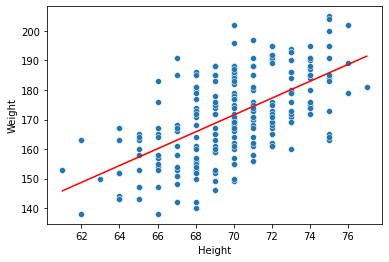

In [23]:
y_pred = 2.8537 * x["Height"] -28.2547
sns.scatterplot(x = x["Height"], y = males["Weight"])
sns.lineplot(x = x["Height"], y = y_pred, color = "red")

In [24]:
# method2: sklearn
from sklearn import linear_model

x2 = np.reshape(np.array(males["Height"]), (len(males["Height"]), 1))
lm2 = linear_model.LinearRegression()
lm2.fit(x2, y)
# lm2.predict(x2)

print("R-squared:", lm2.score(x2, y), "\nWeight =",  float(lm2.coef_), "* Height",  lm2.intercept_ )

R-squared: 0.3635026287541787 
Weight = 2.8536531102607468 * Height -28.254701729405923


*The regression results in a coefficient of slope 2.85 with a p-value much smaller than 0.05, and a constant is -28.25. With the small p-value, it means that height is a strong predictor of weight, and for each unit increase in height, weight will increase by 2.85 units.*  
*The proportion of variance in weight accounted for by height in the dataset is around 0.364. It means that around 36% of the variability observed in the weight is explained by the proposed regression model.*

#### 2. Fit the same regression model using linear algebra. Compare your resultant β's to the ones you obtained earlier.

In [25]:
# Convert the problem to solving vector 𝛽 which equals to (𝑋𝑇𝑋)^ (−1) 𝑋𝑇𝑌
X = males["Height"]
Y = males["Weight"]

X = np.vstack((np.array([1]*len(X)), X)).T # add a column of 1s
XT = np.transpose(X)
XTX = np.matmul(XT, X)
XTX_inv = np.linalg.inv(XTX)

XTY = np.matmul(XT, Y)

B = np.matmul(XTX_inv, XTY)
B

array([-28.25470173,   2.85365311])

*β0 = -28.25, corresponding to the constant / intercept of linear regression. β1 = 2.85, corresponding to the slope or the coefficient in previous regression result.*